In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
 link = 'https://drive.google.com/open?id=1xOLj5hcJ9E_h_CGCi0J13ZUA_u5sRHf5' # The shareable link
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1xOLj5hcJ9E_h_CGCi0J13ZUA_u5sRHf5


In [4]:
# importing dependacy packages
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #for splitting the data into tarining and testing
from sklearn.preprocessing import LabelEncoder       #for encode the labels in the form of[1,2,3,4,5]
from sklearn.preprocessing import OneHotEncoder      #encode the labels in the form of[1,0,0,0,0...]
# importing the LSTM/RNN package from keras module with different hyper parameter
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

Using TensorFlow backend.


In [0]:
# import dataset into notebook 
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('bbc-text.csv')  
df = pd.read_csv('bbc-text.csv', encoding='utf8')

In [7]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
category    2225 non-null object
text        2225 non-null object
dtypes: object(2)
memory usage: 34.8+ KB


Text(0.5, 1.0, 'categories')

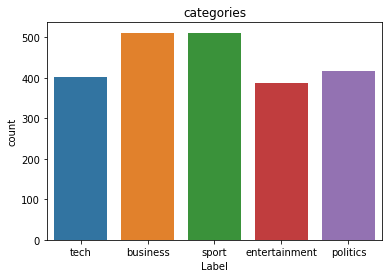

In [9]:
# analytic visualization for checking the balancing in dataset
sns.countplot(df.category)
plt.xlabel('Label')
plt.title('categories')

In [0]:
# creating variables and converting the labels into OneHOt array for binary classification
X = df.text
Y = df.category
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)
Y = to_categorical(Y)
print(Y[50])


In [0]:
# spliting the data set 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

In [0]:
# coverting the text info into tokenizing form for creating vectors
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)


In [0]:
#structure of RNN model
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs) # contains the word lenght and batch_sixe as argument
    layer = LSTM(64)(layer)                                      # declairing the no. 0f layers?/RNN units
    layer = Dense(256,name='FC1')(layer)                         # declairing no.of neurons used in fullyconnected layer
    layer = Activation('relu')(layer)                            # using activation fuction Relu
    layer = Dropout(0.5)(layer)
    layer = Dense(5,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [20]:
# calling the model
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 5)                 1285

In [22]:
#training the model
model.fit(sequences_matrix,Y_train,batch_size=623,epochs=20,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 1245 samples, validate on 312 samples
Epoch 1/20
1245/1245 [==============================] - 1s 1ms/step - loss: 0.5967 - acc: 0.8000 - val_loss: 0.6276 - val_acc: 0.8000
Epoch 2/20
1245/1245 [==============================] - 2s 1ms/step - loss: 0.5875 - acc: 0.8000 - val_loss: 0.5060 - val_acc: 0.8000
Epoch 3/20
1245/1245 [==============================] - 2s 1ms/step - loss: 0.5091 - acc: 0.8000 - val_loss: 0.5028 - val_acc: 0.8000
Epoch 4/20
1245/1245 [==============================] - 2s 1ms/step - loss: 0.5098 - acc: 0.8000 - val_loss: 0.5042 - val_acc: 0.8000


In [0]:
# evaluating the result
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [24]:
accr = model.evaluate(test_sequences_matrix,Y_test)

668/668 [==============================] - 0s 589us/step


In [25]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.503
  Accuracy: 0.800


In [0]:
#plt.plot(history.history['accr'])
#plt.plot(history.history['val_acc'])
#plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['X', 'Y'], loc='upper left')
plt.show()